In [49]:
import pandas as pd

df = pd.read_csv('C:\Research_temp\data\KinectData\OralDefense\VSFile.csv', header=None)

df.columns=['WristRightX', 'WristRightY', 'WristRightZ', 
            'WristLeftX', 'WristLeftY', 'WristLeftZ', 
            'ElbowRightX', 'ElbowRightY', 'ElbowRightZ',
           'ElbowLeftX', 'ElbowLeftY', 'ElbowLeftZ',
           'ShoulderRightX', 'ShoulderRightY', 'ShoulderRightZ',
           'ShoulderLeftX', 'ShoulderLeftY', 'ShoulderLeftZ',
            'SkeletonId', 'HeadX_Video', 'HeadY_Video', 'TimeStamp']
df.head()

,WristRightX,WristRightY,WristRightZ,WristLeftX,WristLeftY,WristLeftZ,ElbowRightX,ElbowRightY,ElbowRightZ,ElbowLeftX,...,ShoulderRightX,ShoulderRightY,ShoulderRightZ,ShoulderLeftX,ShoulderLeftY,ShoulderLeftZ,SkeletonId,HeadX_Video,HeadY_Video,TimeStamp
0,-0.162327,-0.503707,1.48369,-0.534310,-0.476088,1.50450,-0.160607,-0.284722,1.59467,-0.547796,...,-0.179105,-0.028570,1.58343,-0.521325,-0.034221,1.56688,2,539.006,252.230,12:28:20:509
1,-0.159689,-0.500003,1.48556,-0.532951,-0.477238,1.50386,-0.161383,-0.284518,1.59507,-0.547420,...,-0.180888,-0.028075,1.58289,-0.522318,-0.034269,1.56814,2,537.364,252.388,12:28:20:597
2,-0.162448,-0.499958,1.48461,-0.532929,-0.477334,1.50365,-0.162027,-0.284417,1.59530,-0.547312,...,-0.181544,-0.027933,1.58271,-0.522890,-0.034253,1.56861,2,536.655,252.447,12:28:20:643
3,-0.163415,-0.499938,1.48460,-0.533067,-0.477601,1.50348,-0.162665,-0.284415,1.59562,-0.547494,...,-0.182230,-0.027784,1.58267,-0.523235,-0.034372,1.56910,2,535.858,252.540,12:28:20:691
4,-0.166003,-0.498832,1.48503,-0.533613,-0.477302,1.50756,-0.163892,-0.284437,1.59611,-0.549747,...,-0.184641,-0.027140,1.58222,-0.525324,-0.034753,1.57055,2,533.648,252.723,12:28:20:749


In [50]:
df.shape

(900, 22)

# 測試手臂長度是否一樣

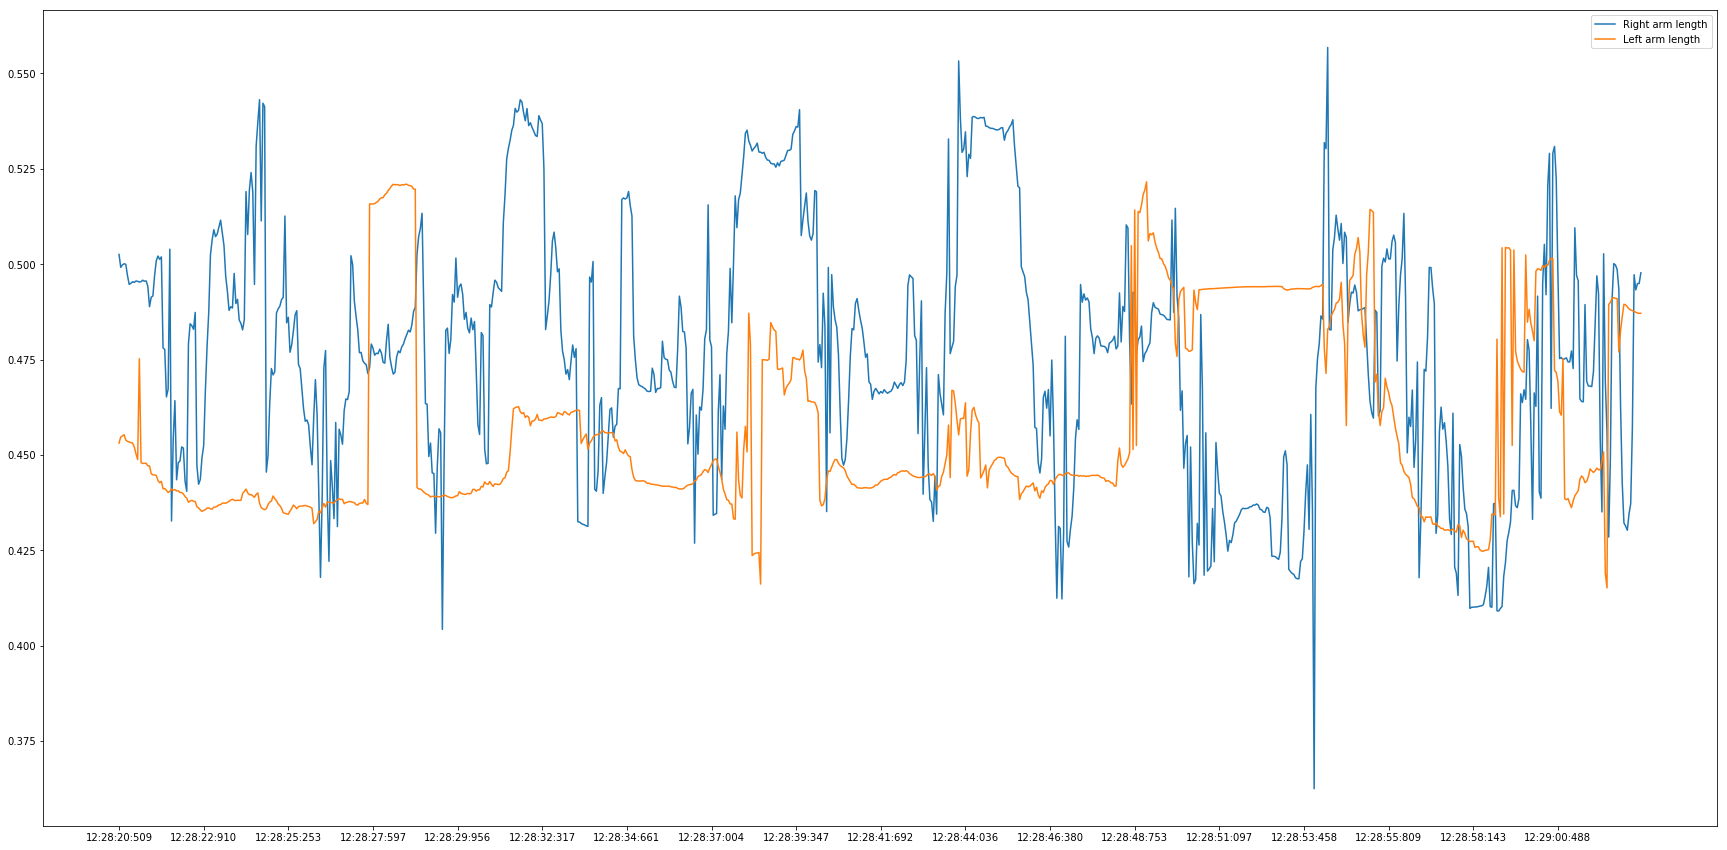

Left arm length(Average) = 0.458020
Right arm length(Average) = 0.476940


In [116]:
import numpy as np
import scipy
%matplotlib inline
import matplotlib.pyplot as plt

#測試手臂長度是否一樣
WristRightCoor_pd = df[['WristRightX', 'WristRightY', 'WristRightZ']]
ElbowRightCoor_pd = df[['ElbowRightX', 'ElbowRightY', 'ElbowRightZ']]
ShoulderRightCoor_pd = df[['ShoulderRightX', 'ShoulderRightY', 'ShoulderRightZ']]

WristLeftCoor_pd = df[['WristLeftX', 'WristLeftY', 'WristLeftZ']]
ElbowLeftCoor_pd = df[['ElbowLeftX', 'ElbowLeftY', 'ElbowLeftZ']]
ShoulderLeftCoor_pd = df[['ShoulderLeftX', 'ShoulderLeftY', 'ShoulderLeftZ']]

rightArmNorm = []
leftArmNorm = []

for WristRightCoor, ElbowRightCoor, ShoulderRightCoor in zip(WristRightCoor_pd.values, ElbowRightCoor_pd.values, ShoulderRightCoor_pd.values):
    rightArmNorm.append(np.linalg.norm(WristRightCoor - ElbowRightCoor, ord=2) + np.linalg.norm(ElbowRightCoor - ShoulderRightCoor, ord=2))

for WristLeftCoor, ElbowLeftCoor, ShoulderLeftCoor in zip(WristLeftCoor_pd.values, ElbowLeftCoor_pd.values, ShoulderLeftCoor_pd.values):
    leftArmNorm.append(np.linalg.norm(WristLeftCoor - ElbowLeftCoor, ord=2) + np.linalg.norm(ElbowLeftCoor - ShoulderLeftCoor, ord=2))


timeStamp = df['TimeStamp']

plt.figure(figsize=(30, 15))

xtick = list(range(0, len(timeStamp), 50))
plt.xticks(xtick, [timeStamp.values[x] for x in xtick])

plt.plot(rightArmNorm, label='Right arm length')
plt.plot(leftArmNorm, label='Left arm length')

plt.legend(loc='best')
plt.savefig('./figures/Arm_Length.png')
plt.show()

leftArmNorm_mean = np.mean(leftArmNorm)
rightArmNorm_mean = np.mean(rightArmNorm)

print("Left arm length(Average) = %f" % leftArmNorm_mean)
print("Right arm length(Average) = %f" % rightArmNorm_mean)

# Reach out時 肩膀與手腕的距離變化圖

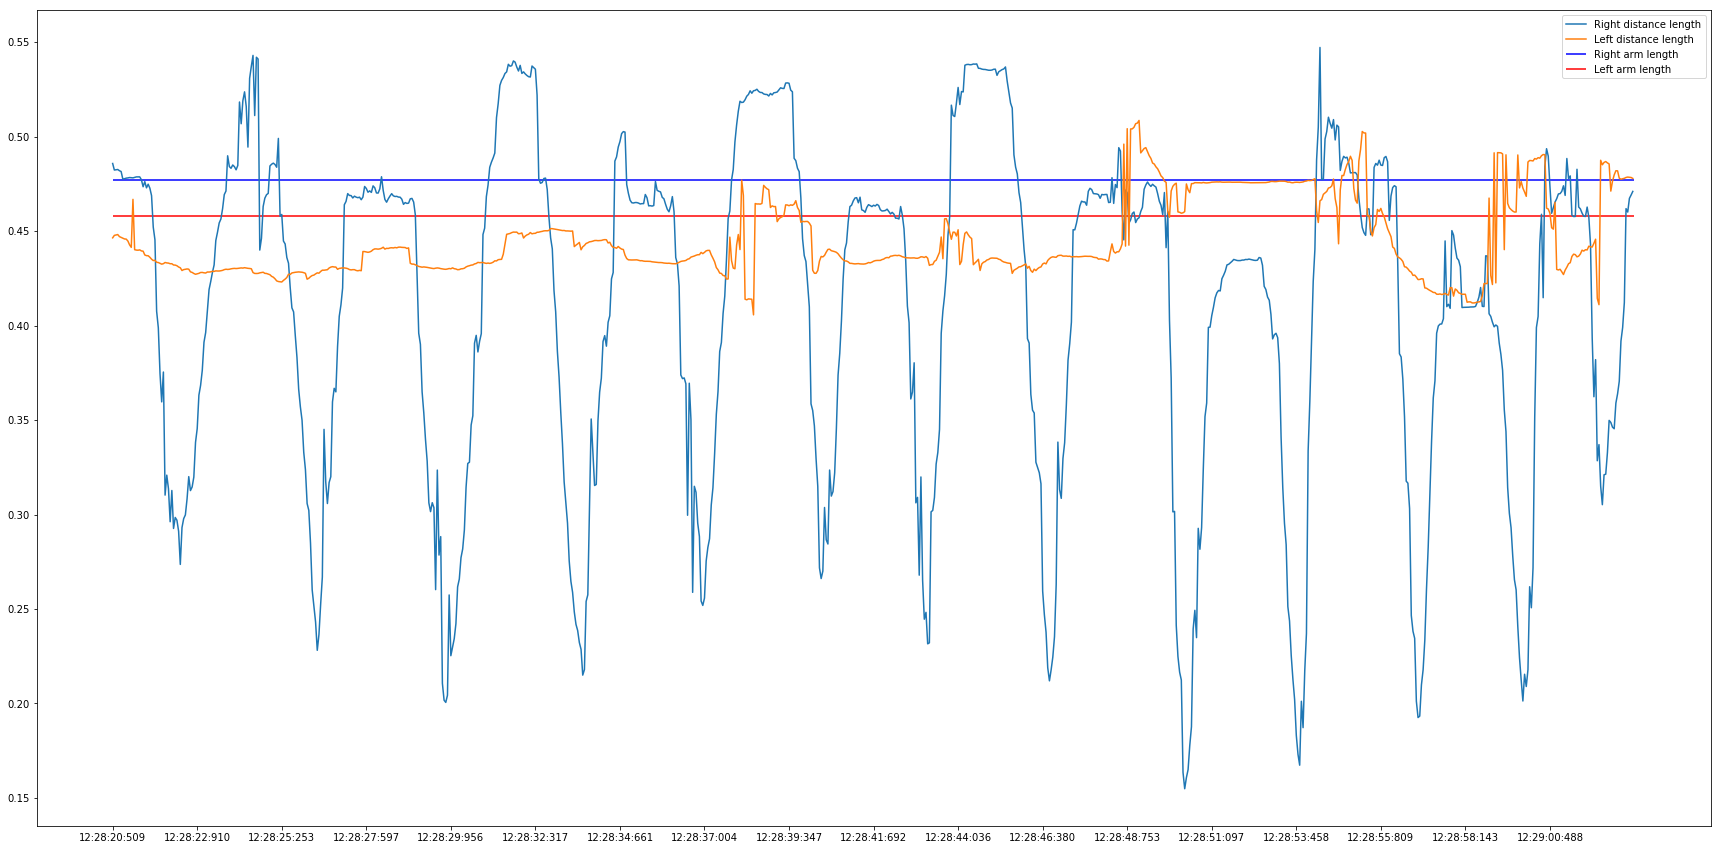

Left distance length(Average) = 0.445290
Right distance length(Average) = 0.411582


In [117]:
rightDisNorm = []
leftDisNorm = []

for WristRightCoor, ShoulderRightCoor in zip(WristRightCoor_pd.values, ShoulderRightCoor_pd.values):
    rightDisNorm.append(np.linalg.norm(WristRightCoor - ShoulderRightCoor, ord=2))

for WristLeftCoor, ElbowLeftCoor, ShoulderLeftCoor in zip(WristLeftCoor_pd.values, ElbowLeftCoor_pd.values, ShoulderLeftCoor_pd.values):
    leftDisNorm.append(np.linalg.norm(WristLeftCoor - ShoulderLeftCoor, ord=2))


timeStamp = df['TimeStamp']

plt.figure(figsize=(30,15))

xtick = list(range(0, len(timeStamp), 50))
plt.xticks(xtick, [timeStamp.values[x] for x in xtick])

plt.plot(rightDisNorm, label='Right distance length')
plt.plot(leftDisNorm, label='Left distance length')

plt.hlines(y=rightArmNorm_mean, xmin=0, xmax=len(rightDisNorm), label='Right arm length', colors='blue')
plt.hlines(y=leftArmNorm_mean, xmin=0, xmax=len(leftDisNorm), label='Left arm length', colors='red')

plt.legend(loc='best')
plt.savefig('./figures/distance_BetweenWS_Length.png')
plt.show()

print("Left distance length(Average) = %f" % np.mean(leftDisNorm))
print("Right distance length(Average) = %f" % np.mean(rightDisNorm))

In [43]:
leftDisNorm

[0.44643736437937181,
 0.44773477132808215,
 0.44792958442287562,
 0.4481677511018502,
 0.44708579823447764,
 0.44666028475073766,
 0.44622997168168793,
 0.44584173537748795,
 0.44576951118244951,
 0.44475102183621795,
 0.44272482602809837,
 0.44140193706004505,
 0.46680216544951886,
 0.440169348301719,
 0.43995536010286318,
 0.43988144779893823,
 0.44006855269464557,
 0.43949726790295301,
 0.43939458052852676,
 0.43737093130409338,
 0.43701339631933483,
 0.43695363242258328,
 0.43615930249564777,
 0.43513670216869782,
 0.43440163438528862,
 0.43458286596331658,
 0.43351488421737033,
 0.43335854790495359,
 0.43292196219375378,
 0.43251244716405557,
 0.4327620631183029,
 0.43338615496524574,
 0.43316406217418357,
 0.43306726299021953,
 0.43272756703751847,
 0.43273894751552006,
 0.43206484273753404,
 0.43201004318330377,
 0.43166840256183919,
 0.43100245542804033,
 0.4305869929049066,
 0.42914085467861252,
 0.42962294723593392,
 0.42981844775706179,
 0.42996560710945247,
 0.429843431885

In [44]:
leftDisNorm

[0.44643736437937181,
 0.44773477132808215,
 0.44792958442287562,
 0.4481677511018502,
 0.44708579823447764,
 0.44666028475073766,
 0.44622997168168793,
 0.44584173537748795,
 0.44576951118244951,
 0.44475102183621795,
 0.44272482602809837,
 0.44140193706004505,
 0.46680216544951886,
 0.440169348301719,
 0.43995536010286318,
 0.43988144779893823,
 0.44006855269464557,
 0.43949726790295301,
 0.43939458052852676,
 0.43737093130409338,
 0.43701339631933483,
 0.43695363242258328,
 0.43615930249564777,
 0.43513670216869782,
 0.43440163438528862,
 0.43458286596331658,
 0.43351488421737033,
 0.43335854790495359,
 0.43292196219375378,
 0.43251244716405557,
 0.4327620631183029,
 0.43338615496524574,
 0.43316406217418357,
 0.43306726299021953,
 0.43272756703751847,
 0.43273894751552006,
 0.43206484273753404,
 0.43201004318330377,
 0.43166840256183919,
 0.43100245542804033,
 0.4305869929049066,
 0.42914085467861252,
 0.42962294723593392,
 0.42981844775706179,
 0.42996560710945247,
 0.429843431885

In [109]:
a = list(range(0, len(timeStamp)+1, 50))

In [110]:
a.append(788)

In [111]:
for b in a:
    print(b)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
788


In [107]:
[timeStamp.values[x] for x in xtick]

TypeError: 'NoneType' object is not iterable

In [108]:
xtick